## Comparando modelos utilizando as métricas de avaliação de modelos

In [1]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import statsmodels.api as sm

Importando o Dataset

In [2]:
from sklearn import datasets
data  = datasets.load_diabetes()
X = data.data
y = data.target
feature_names = data.feature_names

Contextualização:

O conjunto de dados de diabetes usado neste exemplo é proveniente do sklearn.datasets. As variáveis presentes no conjunto de dados são:

*   age: Idade do paciente.
*   sex: Gênero do paciente (0: feminino, 1: masculino).
*   bmi: Índice de massa corporal (IMC).
*   bp: Pressão arterial média.
*   s1: Total de soro de lipoproteína de alta densidade (HDL).
*   s2: Total de soro de lipoproteína de baixa densidade (LDL).
*   s3: Total de soro de triglicerídeos.
*   s4: Total de soro de total de lipoproteína.
*   s5: Total de soro de ácido sérico.
*   s6: Total de soro de lamotrigina.
Cada uma dessas variáveis representa diferentes características médicas e fisiológicas dos pacientes.

O objetivo é prever a medida quantitativa da progressão da doença diabética após um ano com base nessas características. O valor alvo (target) é uma medida quantitativa da progressão da doença.

Verificando os dados carregados

In [3]:
data.feature_names #nome das variaveis

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [4]:
data.data.shape  #tamanho da base de dados

(442, 10)

In [5]:
data.target.shape

(442,)

Criando um data frame para iniciar as analises

In [6]:
db_df = pd.DataFrame(data.data,columns=data.feature_names)

In [7]:
db_df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930


In [8]:
db_df['progressao'] = data.target

In [9]:
db_df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,progressao
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0


In [10]:
db_df.isna().sum() #verificando valores ausentes

age           0
sex           0
bmi           0
bp            0
s1            0
s2            0
s3            0
s4            0
s5            0
s6            0
progressao    0
dtype: int64

# Análise descritiva

In [11]:
db_df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,progressao
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01,346.000000


In [13]:
db_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age         442 non-null    float64
 1   sex         442 non-null    float64
 2   bmi         442 non-null    float64
 3   bp          442 non-null    float64
 4   s1          442 non-null    float64
 5   s2          442 non-null    float64
 6   s3          442 non-null    float64
 7   s4          442 non-null    float64
 8   s5          442 non-null    float64
 9   s6          442 non-null    float64
 10  progressao  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


***Análise gráfica***

A análise gráfica é uma maenira eficaz de entender as relações de variáveis 
 e identificar padrões nos dados.

O pairplot cria um conjunto de gráficos de dispersão entre todas as variáveis, além de exibir histogramas na diagonal. Isso permite visualizar rapidamente as relações entre as variáveis.

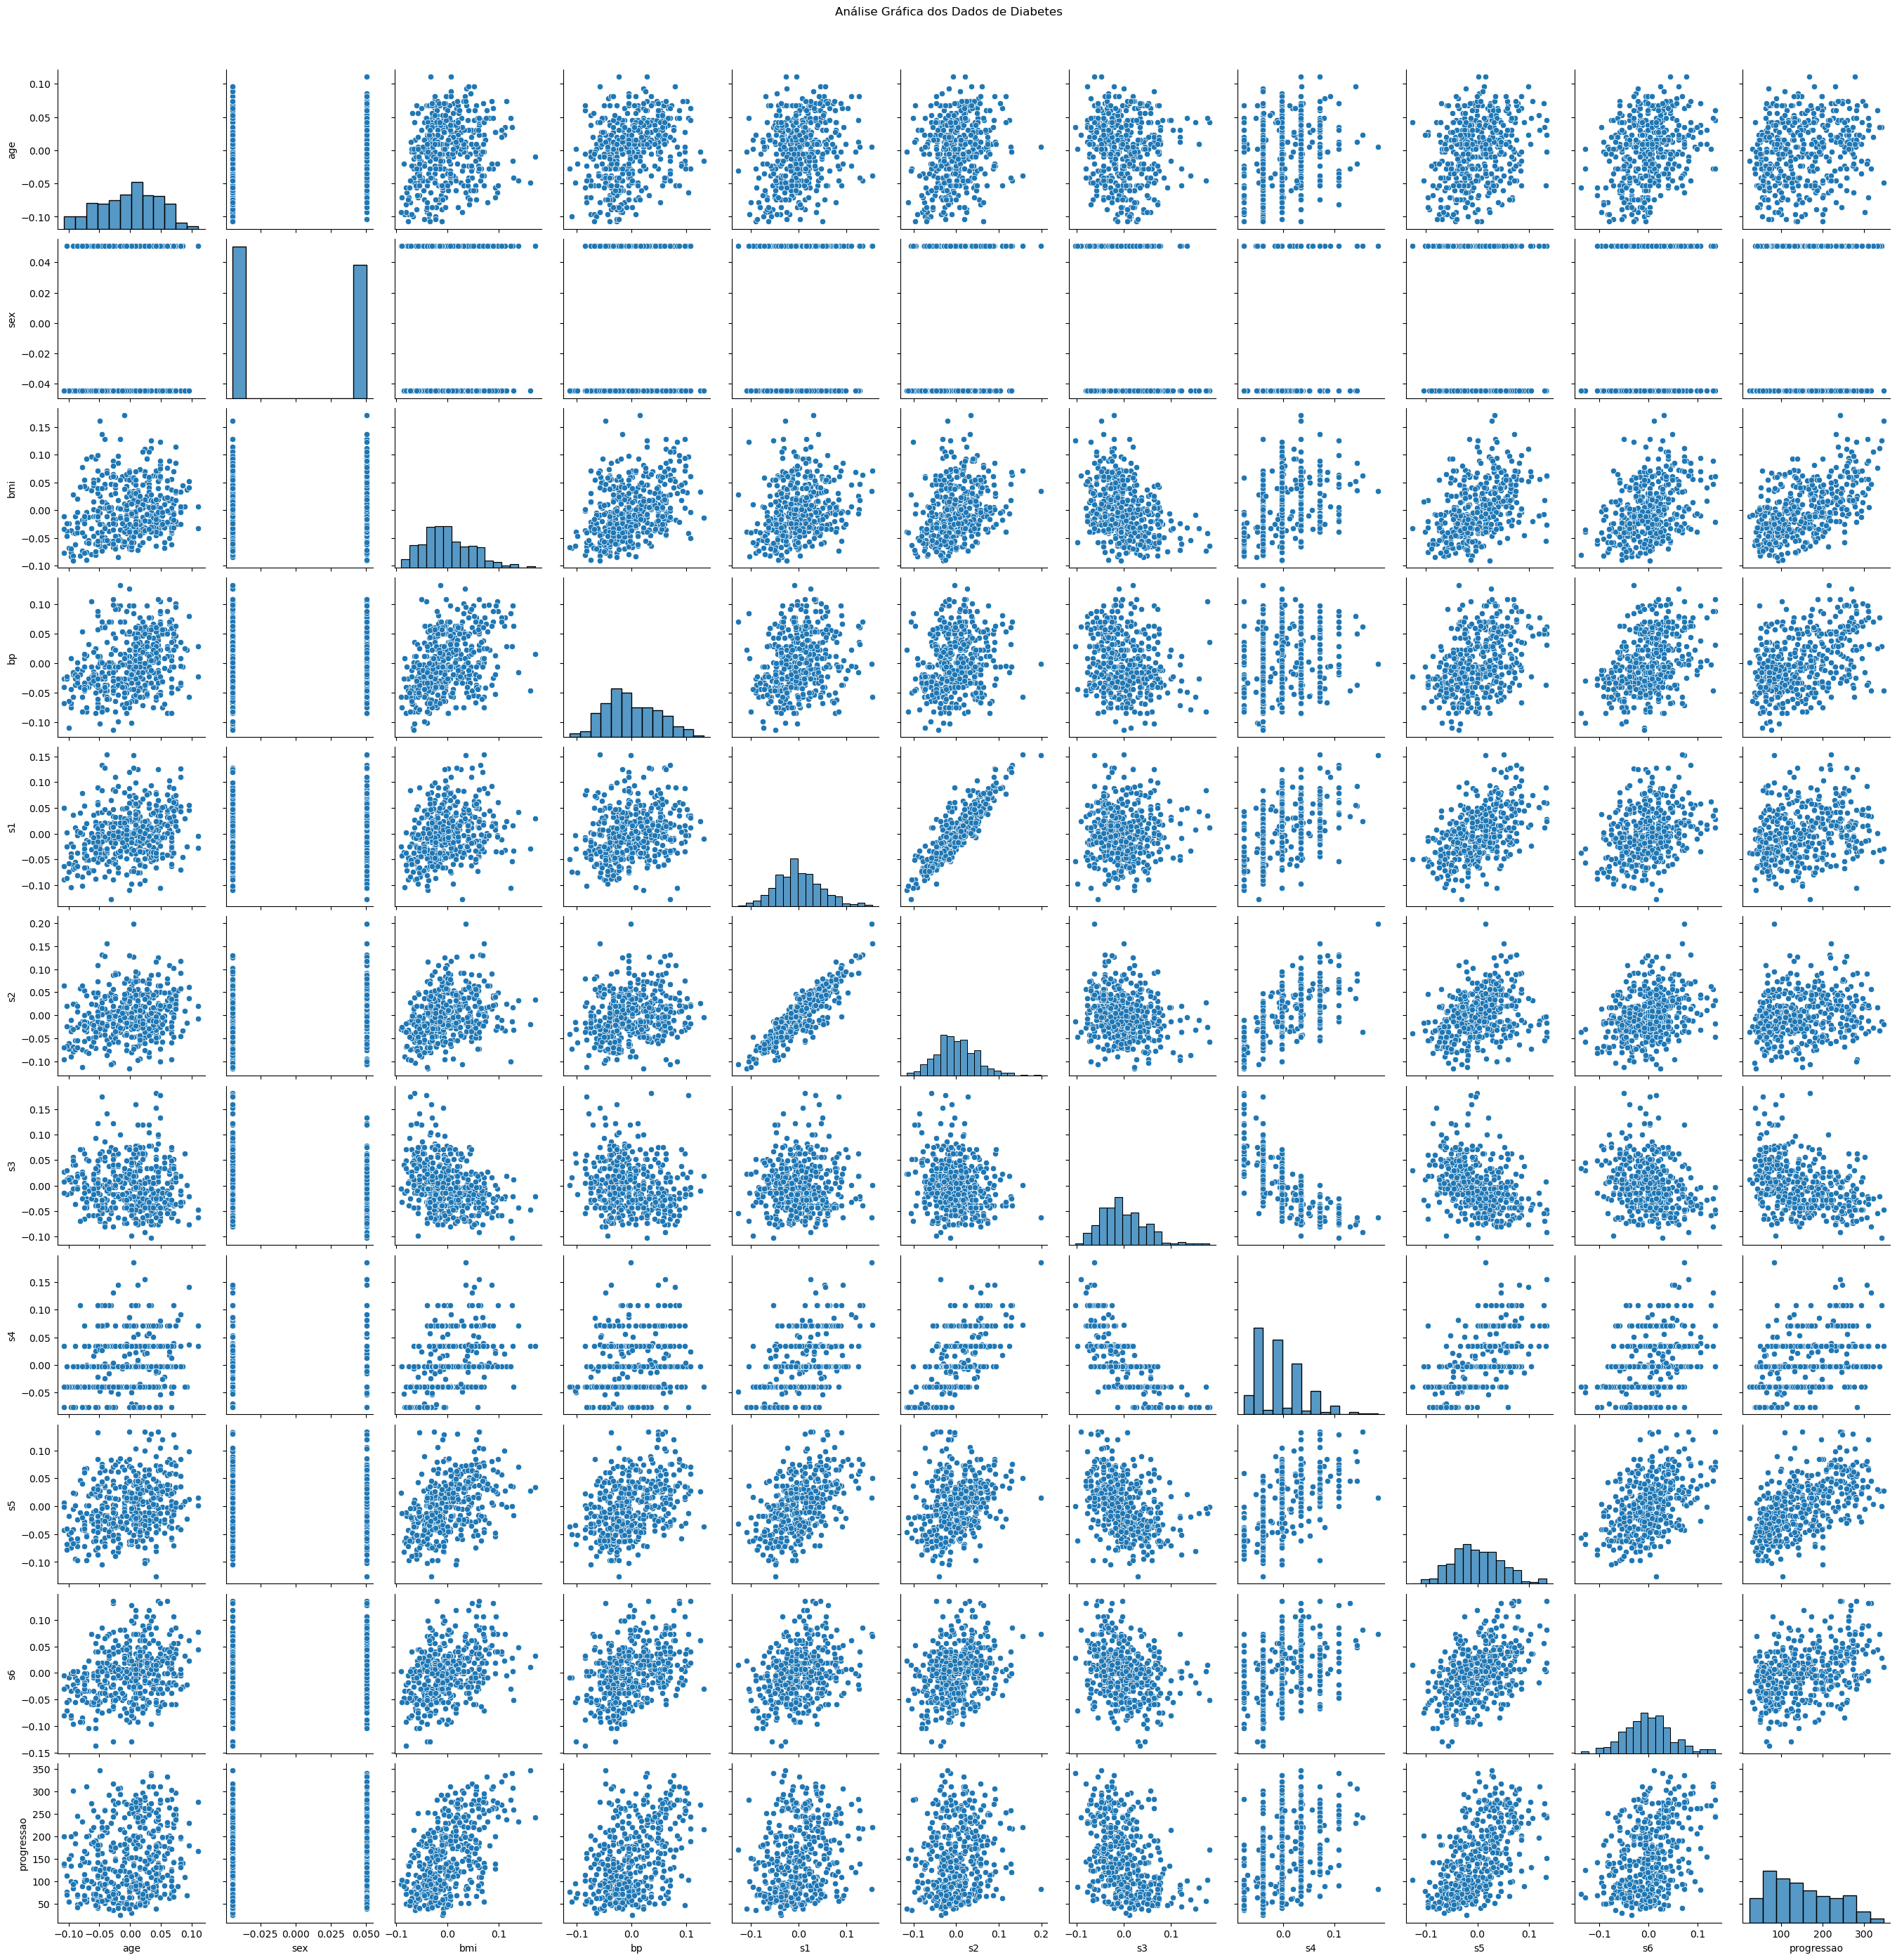

In [12]:
# Análise gráfica - Pairplot
sns.pairplot(db_df)
plt.suptitle("Análise Gráfica dos Dados de Diabetes", y=1.02)
plt.show()

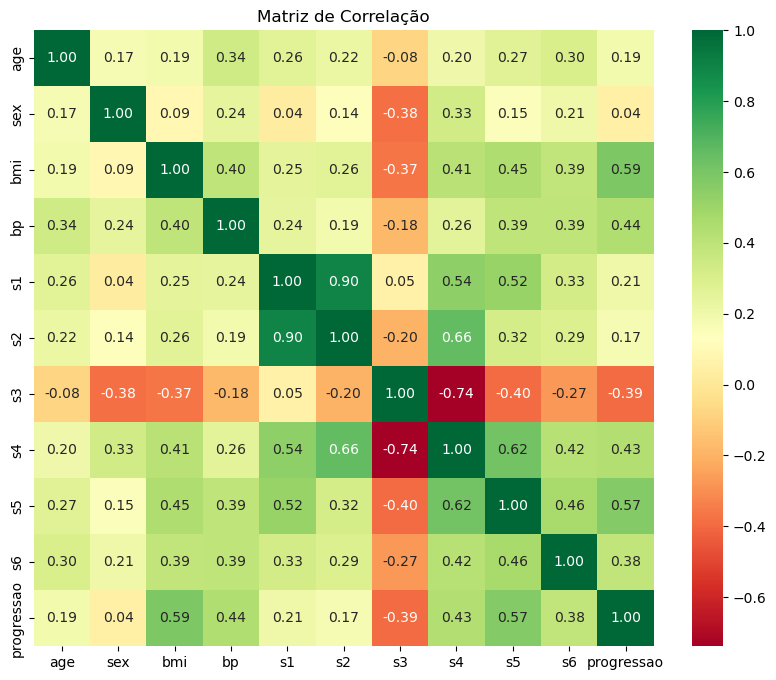

In [14]:
# Correlação entre variáveis
correlation_matrix = db_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="RdYlGn", fmt=".2f")
plt.title("Matriz de Correlação")
plt.show()

Maiores correlações com a progressão :
   - bmi : 0.59
   - s5 : 0.57
   - bp : 0.44
   - s4 : 0.43
   - s3: 0.39    

Criando modelos baseado na correlação das variáveis

In [15]:
db_df.head(0) #para verificar o nome das variaveis

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,progressao


In [16]:
results = []

Regressão linear simples com a variável mais correlacionada com nossa resposta

In [17]:
lm1 = sm.OLS.from_formula("progressao ~ bmi", data=db_df)

In [18]:
model_1 = lm1.fit()

In [19]:
print("Análise do Modelo 1:")
print(model_1.summary())
print("=" * 80)

Análise do Modelo 1:
                            OLS Regression Results                            
Dep. Variable:             progressao   R-squared:                       0.344
Model:                            OLS   Adj. R-squared:                  0.342
Method:                 Least Squares   F-statistic:                     230.7
Date:                Sat, 17 Feb 2024   Prob (F-statistic):           3.47e-42
Time:                        19:17:29   Log-Likelihood:                -2454.0
No. Observations:                 442   AIC:                             4912.
Df Residuals:                     440   BIC:                             4920.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    152.1335      2.97

In [24]:
results.append({
    'Modelo': 'Modelo 1',
    'MAE': np.mean(np.abs(y - model_1.predict())),
    'MSE': np.mean((y - model_1.predict())**2),
    'AIC': model_1.aic,
    'BIC': model_1.bic,
    'R²': model_1.rsquared
})

In [25]:
lm2 = sm.OLS.from_formula("progressao ~ bmi+s5", data=db_df)
model_2 = lm2.fit()
print("Análise do Modelo 2:")
print(model_2.summary())
print("=" * 80)

Análise do Modelo 2:
                            OLS Regression Results                            
Dep. Variable:             progressao   R-squared:                       0.459
Model:                            OLS   Adj. R-squared:                  0.457
Method:                 Least Squares   F-statistic:                     186.6
Date:                Sat, 17 Feb 2024   Prob (F-statistic):           2.25e-59
Time:                        19:25:49   Log-Likelihood:                -2411.2
No. Observations:                 442   AIC:                             4828.
Df Residuals:                     439   BIC:                             4841.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    152.1335      2.70

In [26]:
results.append({
    'Modelo': 'Modelo 2',
    'MAE': np.mean(np.abs(y - model_2.predict())),
    'MSE': np.mean((y - model_2.predict())**2),
    'AIC': model_2.aic,
    'BIC': model_2.bic,
    'R²': model_2.rsquared
})

In [27]:
lm3 = sm.OLS.from_formula("progressao ~ bmi+s5+bp", data=db_df)
model_3 = lm3.fit()
print("Análise do Modelo 3:")
print(model_2.summary())
print("=" * 80)

Análise do Modelo 3:
                            OLS Regression Results                            
Dep. Variable:             progressao   R-squared:                       0.459
Model:                            OLS   Adj. R-squared:                  0.457
Method:                 Least Squares   F-statistic:                     186.6
Date:                Sat, 17 Feb 2024   Prob (F-statistic):           2.25e-59
Time:                        19:26:01   Log-Likelihood:                -2411.2
No. Observations:                 442   AIC:                             4828.
Df Residuals:                     439   BIC:                             4841.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    152.1335      2.70

In [28]:
results.append({
    'Modelo': 'Modelo 3',
    'MAE': np.mean(np.abs(y - model_3.predict())),
    'MSE': np.mean((y - model_3.predict())**2),
    'AIC': model_3.aic,
    'BIC': model_3.bic,
    'R²': model_3.rsquared
})

In [29]:
lm4 = sm.OLS.from_formula("progressao ~ bmi+s5+bp+s4", data=db_df)
model_4 = lm4.fit()
print("Análise do Modelo 4:")
print(model_4.summary())
print("=" * 80)

Análise do Modelo 4:
                            OLS Regression Results                            
Dep. Variable:             progressao   R-squared:                       0.481
Model:                            OLS   Adj. R-squared:                  0.477
Method:                 Least Squares   F-statistic:                     101.4
Date:                Sat, 17 Feb 2024   Prob (F-statistic):           5.41e-61
Time:                        19:26:28   Log-Likelihood:                -2402.1
No. Observations:                 442   AIC:                             4814.
Df Residuals:                     437   BIC:                             4835.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    152.1335      2.65

In [30]:
results.append({
    'Modelo': 'Modelo 4',
    'MAE': np.mean(np.abs(y - model_4.predict())),
    'MSE': np.mean((y - model_4.predict())**2),
    'AIC': model_4.aic,
    'BIC': model_4.bic,
    'R²': model_4.rsquared
})

In [31]:
lm5 = sm.OLS.from_formula("progressao ~ bmi+s5+bp+s4+s3", data=db_df)
model_5 = lm5.fit()
print("Análise do Modelo 5:")
print(model_5.summary())
print("=" * 80)

Análise do Modelo 5:
                            OLS Regression Results                            
Dep. Variable:             progressao   R-squared:                       0.494
Model:                            OLS   Adj. R-squared:                  0.488
Method:                 Least Squares   F-statistic:                     85.09
Date:                Sat, 17 Feb 2024   Prob (F-statistic):           2.88e-62
Time:                        19:26:31   Log-Likelihood:                -2396.7
No. Observations:                 442   AIC:                             4805.
Df Residuals:                     436   BIC:                             4830.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    152.1335      2.62

In [32]:
results.append({
    'Modelo': 'Modelo 5',
    'MAE': np.mean(np.abs(y - model_5.predict())),
    'MSE': np.mean((y - model_5.predict())**2),
    'AIC': model_5.aic,
    'BIC': model_5.bic,
    'R²': model_5.rsquared
})

In [33]:
lm6 = sm.OLS.from_formula("progressao ~ age+sex+bmi+bp+s1+s2+s3+s4+s5+s6", data=db_df)
model_6 = lm6.fit()
print("Análise do Modelo 6:")
print(model_6.summary())
print("=" * 80)

Análise do Modelo 6:
                            OLS Regression Results                            
Dep. Variable:             progressao   R-squared:                       0.518
Model:                            OLS   Adj. R-squared:                  0.507
Method:                 Least Squares   F-statistic:                     46.27
Date:                Sat, 17 Feb 2024   Prob (F-statistic):           3.83e-62
Time:                        19:26:36   Log-Likelihood:                -2386.0
No. Observations:                 442   AIC:                             4794.
Df Residuals:                     431   BIC:                             4839.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    152.1335      2.57

In [34]:
results.append({
    'Modelo': 'Modelo 6',
    'MAE': np.mean(np.abs(y - model_6.predict())),
    'MSE': np.mean((y - model_6.predict())**2),
    'AIC': model_6.aic,
    'BIC': model_6.bic,
    'R²': model_6.rsquared
})

In [35]:
# Criar um DataFrame com os resultados
results_df = pd.DataFrame(results)

# Imprimir a tabela de resultados
print(results_df)

     Modelo        MAE          MSE          AIC          BIC        R²
0  Modelo 1  51.798628  3890.456585  4912.038221  4920.220840  0.343924
1  Modelo 1  51.798628  3890.456585  4912.038221  4920.220840  0.343924
2  Modelo 2  46.798391  3205.190077  4828.398453  4840.672383  0.459485
3  Modelo 3  45.889904  3083.051343  4813.226049  4829.591289  0.480082
4  Modelo 4  45.842648  3075.769277  4814.180825  4834.637374  0.481310
5  Modelo 5  44.779977  3001.276727  4805.344193  4829.892052  0.493873
6  Modelo 6  43.277452  2859.696348  4793.985724  4838.990133  0.517748


Observe que nem sempre as métricas irao coincidir. Por isso devemos entender o que sera melhor para o nosso modelo.

Exercício - 
- Realize analise dos pressupostos dos modelos criados.

- Utilizando a base de dados 'Consumo_cerveja.csv'. Realize a comparação dos modelos, adicionando uma a uma, as variáveis mais correlacionadas com a resposta.